In [65]:
from time import time
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz


Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# 建立模型

In [66]:
def layer(output_dim, input_dim, inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

## 建立輸入層 X

In [67]:
X = tf.placeholder('float', [None, 28*28])

## 建立隱藏層

In [68]:
h = layer(256, 28*28, X, tf.nn.relu)

## 建立輸出層

In [69]:
y_predict = layer(output_dim=10, input_dim=256, inputs=h, activation=None)

# 定義訓練方式

## 建立訓練資料label真實值 placeholder

In [70]:
y_label = tf.placeholder('float', [None, 10])

## 定義loss function

In [71]:
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict, labels=y_label))

在這裡 `softmax` 代表著一種`激勵函數`或是`連結函數`，把線性輸出轉化成我們需要的形式，在這裡則是把它轉成 10 個類別．你可以想把 `evidence` 轉化成每個數字類別的機率．它的定義如下：

$$\text{softmax}(x)= \text{normalize(exp(x))}$$

![](https://www.tensorflow.org/images/softmax-regression-scalargraph.png)

如果把它寫成等式，我們會得到：

![](https://www.tensorflow.org/images/softmax-regression-scalarequation.png)

## 選擇optimizer

In [72]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss_function)

# 定義評估模型的準確率

## 計算每一筆資料是否正確預測

In [73]:
correct_prediction = tf.equal(tf.argmax(y_label, 1), tf.argmax(y_predict, 1))

## 將計算預測正確結果，加總平均

In [74]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# 開始訓練

In [75]:
trainEpochs = 20
batchSize = 100
totalBatchs = int(mnist.train.num_examples / batchSize)
epoch_list = []
loss_list = []
accuracy_list = []

In [76]:
startTime = time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer, feed_dict={X: batch_x, y_label: batch_y})

    loss, acc = sess.run([loss_function, accuracy],
                         feed_dict={X: mnist.validation.images, y_label: mnist.validation.labels})
    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)
    print("Train Epoch:", '%02d' % (epoch + 1), "Loss=", "{:.9f}".format(loss), " Accuracy=", acc)

duration = time() - startTime
print("Train Finished takes:", duration)

Train Epoch: 01 Loss= 3.859387159  Accuracy= 0.8878


Train Epoch: 02 Loss= 2.561898470  Accuracy= 0.909


Train Epoch: 03 Loss= 2.098450422  Accuracy= 0.917


Train Epoch: 04 Loss= 1.733517408  Accuracy= 0.9218


Train Epoch: 05 Loss= 1.571172476  Accuracy= 0.923


Train Epoch: 06 Loss= 1.431431055  Accuracy= 0.93


Train Epoch: 07 Loss= 1.312687159  Accuracy= 0.931


Train Epoch: 08 Loss= 1.203331351  Accuracy= 0.9372


Train Epoch: 09 Loss= 1.161621451  Accuracy= 0.9352


Train Epoch: 10 Loss= 1.121059179  Accuracy= 0.935


Train Epoch: 11 Loss= 1.118381381  Accuracy= 0.9296


Train Epoch: 12 Loss= 1.037583709  Accuracy= 0.9384


Train Epoch: 13 Loss= 0.980960608  Accuracy= 0.9364


Train Epoch: 14 Loss= 0.931746483  Accuracy= 0.9388


Train Epoch: 15 Loss= 0.879065156  Accuracy= 0.9416


Train Epoch: 16 Loss= 0.878280818  Accuracy= 0.939


Train Epoch: 17 Loss= 0.855553627  Accuracy= 0.9398


Train Epoch: 18 Loss= 0.823556602  Accuracy= 0.9442


Train Epoch: 19 Loss= 0.826781452  Accuracy= 0.9408


Train Epoch: 20 Loss= 0.825009227  Accuracy= 0.9412
Train Finished takes: 28.066545724868774


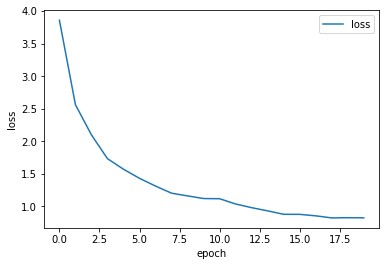

In [77]:
plt.plot(epoch_list, loss_list, label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

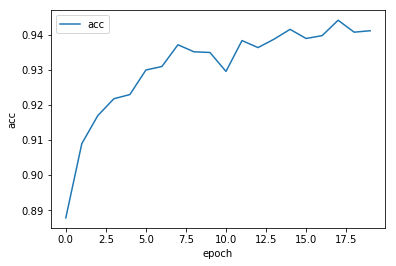

In [78]:
plt.plot(epoch_list, accuracy_list)
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['acc'])

# 評估模型準確率

In [79]:
print("Accuracy:", sess.run(accuracy, feed_dict={X: mnist.test.images, y_label: mnist.test.labels}))

Accuracy: 0.942


# 進行預測

In [80]:
prediction = sess.run(tf.argmax(y_predict, axis=1), feed_dict={X: mnist.test.images})
test_y = sess.run(tf.argmax(y_label, axis=1), feed_dict={y_label: mnist.test.labels})

In [81]:
print(prediction)
print(test_y)

[7 2 1 ..., 4 5 6]
[7 2 1 ..., 4 5 6]


In [82]:
df = pd.DataFrame({'label': test_y, 'predict': prediction})
index = df[df.label != df.predict].index
for i in index[:10]:
    print('真實值為', df.label[i], '  預測值為', df.predict[i])

真實值為 4   預測值為 9
真實值為 3   預測值為 2
真實值為 4   預測值為 9
真實值為 2   預測值為 9
真實值為 7   預測值為 4
真實值為 0   預測值為 5
真實值為 9   預測值為 8
真實值為 2   預測值為 3
真實值為 8   預測值為 9
真實值為 9   預測值為 8


In [83]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: 
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1 + i)

        ax.imshow(np.reshape(images[idx], (28, 28)),
                  cmap='binary')

        title = "label=" + str(labels[idx])
        if len(prediction) > 0:
            title += ",predict=" + str(prediction[idx])

        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

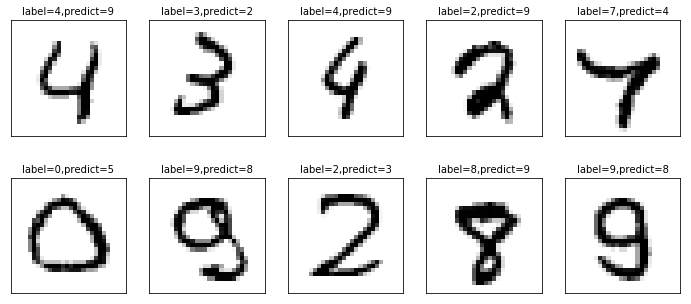

In [84]:
plot_images_labels_prediction(mnist.test.images[index], test_y[index], prediction[index], 0)

In [85]:
sess.close()